In [5]:
# From: https://www.kaggle.com/datasets/abhijeetgo/indian-pines-hyperspectral-dataset/code
# From: https://www.kaggle.com/code/soumyacs/hsi-classification

# See: https://paperswithcode.com/dataset/indian-pines

In [6]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt

In [7]:
imArr = np.load('ground_truth_images/indianpinearray.npy')
gt = np.load('ground_truth_images/indianpine_gt.npy')
classes = np.unique(gt)

In [9]:
print(imArr.shape, gt.shape)
print(classes)

(145, 145, 200) (145, 145)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


(np.float64(-0.5), np.float64(144.5), np.float64(144.5), np.float64(-0.5))

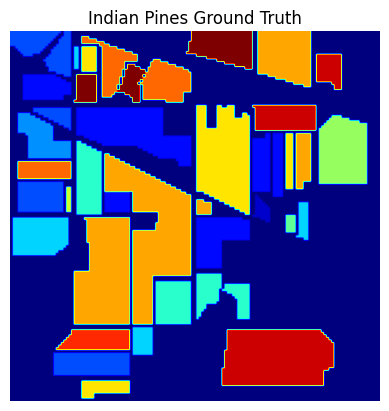

In [20]:
plt.imshow(gt, cmap='jet', vmin=0, vmax=15)
plt.title('Indian Pines Ground Truth')
plt.axis('off')

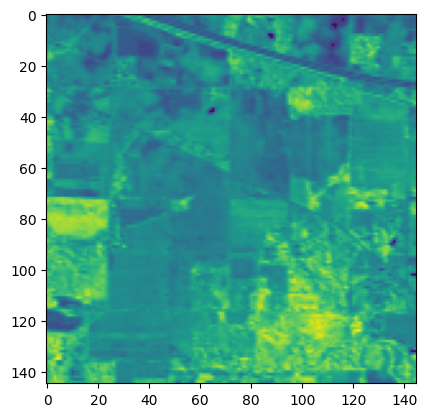

In [25]:
plt.imshow(imArr[:,:,50])

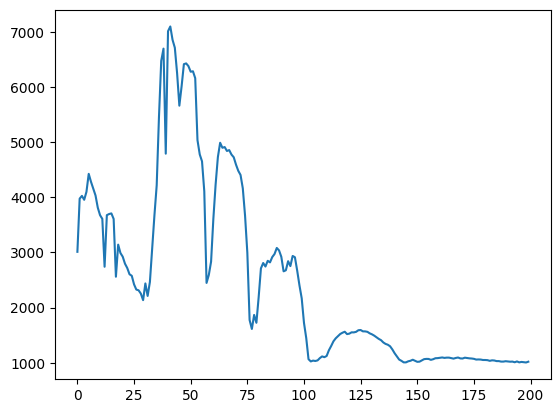

In [27]:
plt.plot(imArr[100,100,:])

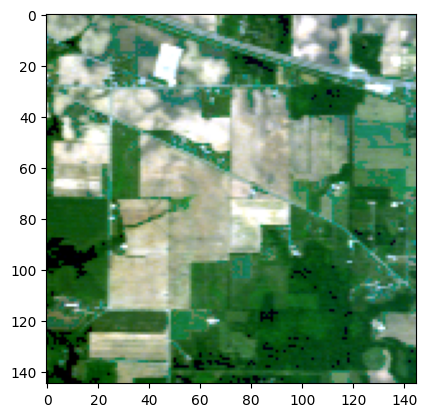

In [37]:
# Create the RGB image, populated with the raw values for each band.
red_band_idx = 25
green_band_idx = 15
blue_band_idx = 5
clr_bands = [25,15,5]

# Clip the bands
imRGB = np.zeros((imArr.shape[0],imArr.shape[0],3))
# Clip the bands
for i in range(3):
    idx = clr_bands[i]
    single_band = np.squeeze(imArr[:,:,idx])
    # Clip the band
    lower_thresh = np.percentile(single_band.flatten(), 2)
    single_band[single_band < lower_thresh] = lower_thresh
    upper_thresh = np.percentile(single_band.flatten(), 98)
    single_band[single_band > upper_thresh] = upper_thresh
    # Rescale to [0,1].
    single_band = single_band - lower_thresh
    single_band = single_band / np.max(single_band)
    # Put the values for this band back into the RGB image.
    imRGB[:,:,i] = single_band

plt.imshow(imRGB);